In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import time
import os
import joblib

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import RandomForestRegressor
from utilies import save_dataset, get_parameters

from rdkit_utilies import SMILES_DataSet
from rdkit_utilies import SMILES_DataSet_Lightway
import utilies as U
from rdkit.Chem import Draw

ImportError: DLL load failed: The specified procedure could not be found.

In [2]:
model_load = joblib.load('./models/model.pkl')

In [ ]:
# Drop columns without smiles

In [9]:
VS_A = pd.read_csv('datasets/DOWNLOAD_EGFR.csv').loc[ : , ['Molecule ChEMBL ID', 'Smiles']]

In [10]:
VS_A 

,Molecule ChEMBL ID,Smiles
0,CHEMBL4216679,C=CC(=O)N[C@@H]1CN(c2nc(Nc3cn(C)nc3OC)c3ncn(C(...
1,CHEMBL142824,Cc1ccc(C(=O)CBr)cc1
2,CHEMBL3219133,C=CC(=O)Nc1cccc(N2C(=O)C(Cc3ccccc3)N(C)C(=O)c3...
3,CHEMBL3219125,C=CC(=O)Nc1cccc(N2C(=O)CN(C)C(=O)c3cnc(Nc4ccc(...
4,CHEMBL3353410,C=CC(=O)Nc1cc(Nc2nccc(-c3cn(C)c4ccccc34)n2)c(O...
...,...,...
31408,CHEMBL5087994,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...
31409,CHEMBL5088907,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...
31410,CHEMBL5091890,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCCCC(=O)N...
31411,CHEMBL5077378,COc1cc(N2CCC(N3CCN(C)CC3)CC2)c(-c2cn[nH]c2)cc1...


In [13]:
VS_A = VS_A[VS_A['Smiles'].notna()]

In [18]:
VS_A.to_csv('datasets/EGFR.csv')

In [15]:
dic = get_parameters(path = './settings/fp_settings.json', print_dict = False)
VS_A_fp = SMILES_DataSet(dataset_df = VS_A, smiles_loc = 'Smiles',
                   fp_radius = dic.get("fp_radius"), fp_bits = dic.get("fp_bits"))

json file path is: ./settings/fp_settings.json


In [16]:
VS_A_fp

(       0pChEMBL  1pChEMBL  2pChEMBL  3pChEMBL  4pChEMBL  5pChEMBL  6pChEMBL  \
 0           1.0       1.0       0.0       0.0       1.0       0.0       0.0   
 1           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
 2           1.0       0.0       0.0       0.0       0.0       1.0       0.0   
 3           1.0       0.0       0.0       0.0       1.0       0.0       0.0   
 4           1.0       0.0       0.0       0.0       0.0       1.0       0.0   
 ...         ...       ...       ...       ...       ...       ...       ...   
 30038       1.0       0.0       0.0       0.0       0.0       1.0       0.0   
 30039       1.0       0.0       0.0       0.0       0.0       1.0       0.0   
 30040       1.0       1.0       0.0       0.0       0.0       0.0       0.0   
 30041       1.0       0.0       0.0       0.0       0.0       0.0       0.0   
 30042       1.0       0.0       0.0       0.0       0.0       1.0       0.0   
 
        7pChEMBL  8pChEMBL  9pChEMBL  

In [17]:
save_dataset(VS_A_fp[0], path = './datasets/screen_results/', file_name = 'EGFR_bits', idx = False)

Current path is: C:\Users\shxld1\Downloads\ML-for-SOS1-main\./datasets/screen_results/
Path already existed.
Dataset saved successfully.


In [19]:
database = pd.read_csv('datasets/EGFR.csv')
screen_database = pd.read_csv('./datasets/screen_results/EGFR_bits.csv')

screen_result = model_load.predict(screen_database)
screen_result_fp = pd.DataFrame({'Predictive Results': screen_result})
A_database_result = pd.concat([database, screen_result_fp], axis = 1)

threshold_7 = A_database_result[A_database_result['Predictive Results'] > 7]
threshold_7 

C:\Users\shxld1\.conda\envs\AIDD_3.7\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Unnamed: 0,Molecule ChEMBL ID,Smiles,Predictive Results
7948,8424,CHEMBL4535474,CNCc1ccccc1-c1csc([C@@H](C)Nc2nc(C)nc3cc(OC)c(...,7.396255
9951,10497,CHEMBL4545109,CCOc1cc2c(N[C@H](C)c3ccccc3)nc(C)nc2cn1,7.525300
13221,13948,CHEMBL4445586,COCCOc1cc2c(N[C@H](C)c3ccc(F)cc3)nc(C)nc2cn1,7.575649
18021,19001,CHEMBL4463000,CC(=O)N[C@@H]1CCN(c2cc3c(NC(C)c4ccc(-c5ccccc5C...,7.149123
18022,19002,CHEMBL4463000,CC(=O)N[C@@H]1CCN(c2cc3c(NC(C)c4ccc(-c5ccccc5C...,7.149123
19305,20340,CHEMBL4535474,CNCc1ccccc1-c1csc([C@@H](C)Nc2nc(C)nc3cc(OC)c(...,7.396255
19538,20584,CHEMBL4535474,CNCc1ccccc1-c1csc([C@@H](C)Nc2nc(C)nc3cc(OC)c(...,7.396255
19680,20732,CHEMBL4463000,CC(=O)N[C@@H]1CCN(c2cc3c(NC(C)c4ccc(-c5ccccc5C...,7.149123
21783,22902,CHEMBL4535474,CNCc1ccccc1-c1csc([C@@H](C)Nc2nc(C)nc3cc(OC)c(...,7.396255
23962,25166,CHEMBL4456281,CCOc1cc2c(N[C@H](C)c3ccc(F)cc3)nc(C)nc2cn1,7.471684


In [20]:
threshold_7.to_csv('datasets/screen_results/EGFR_repurpose.csv')

In [22]:
from rdkit.Chem import Draw

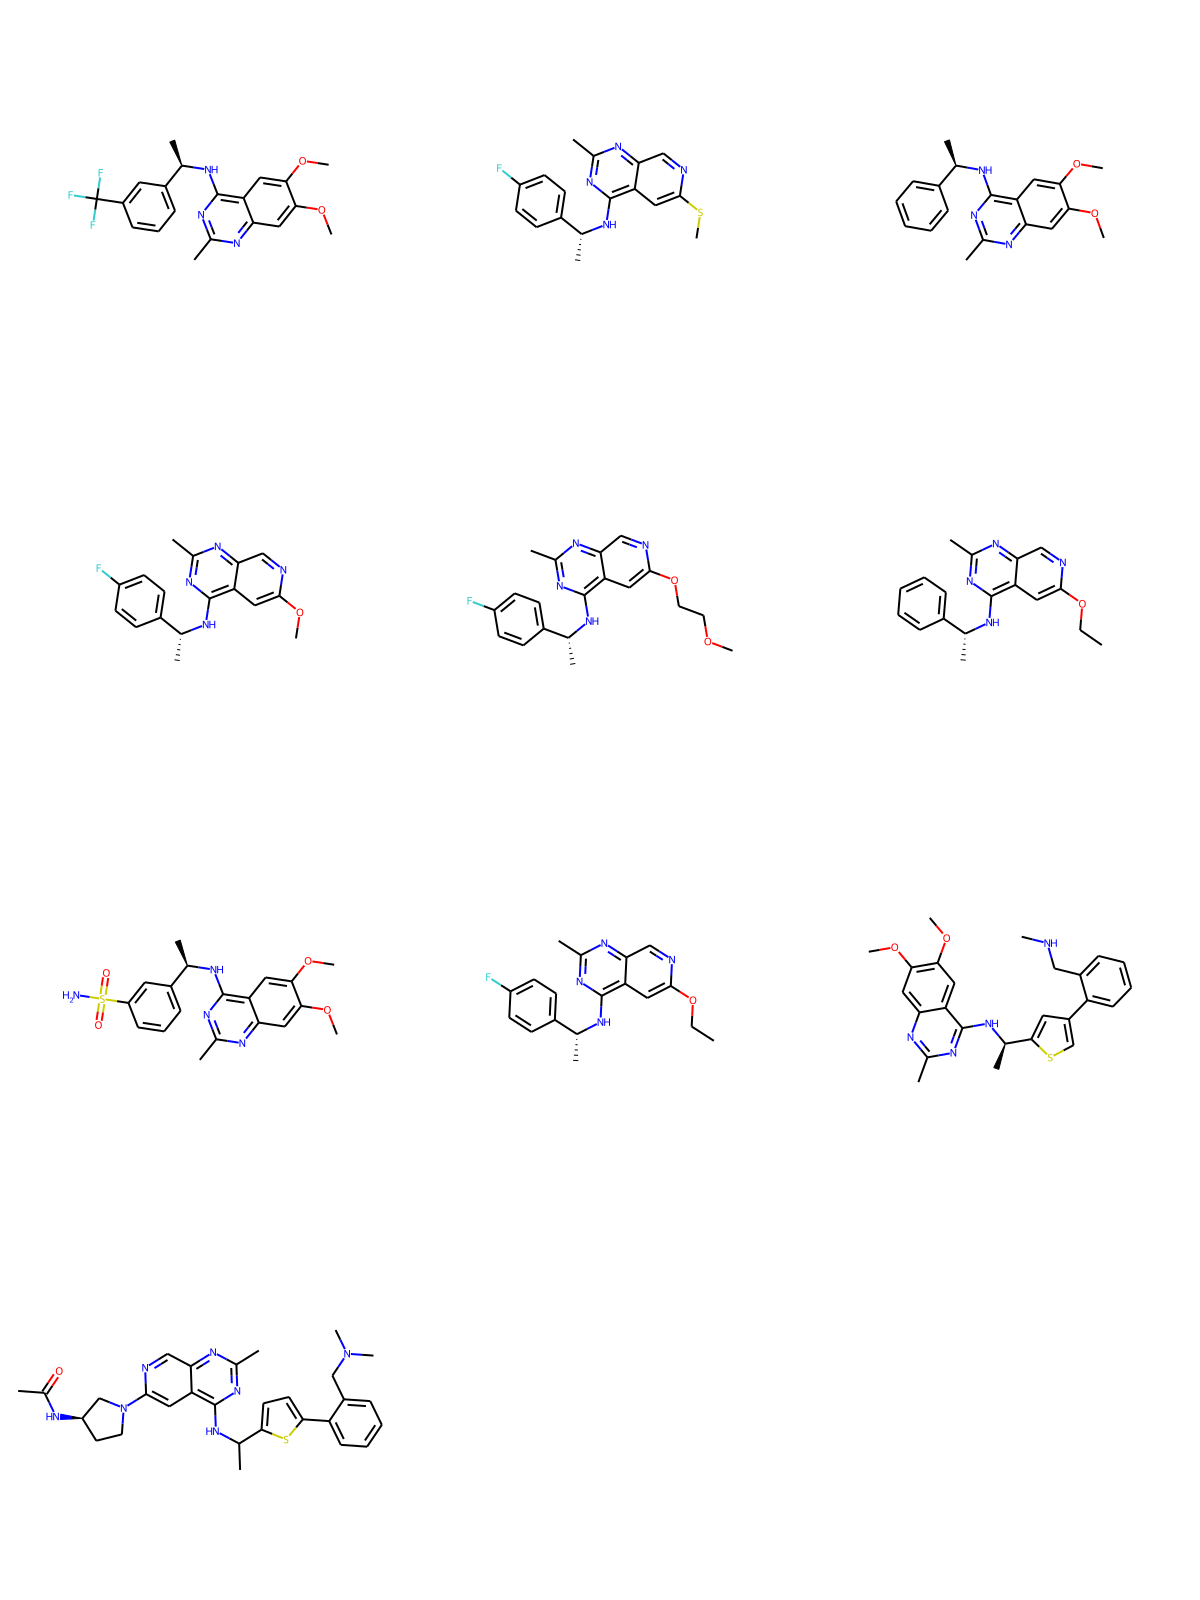

In [24]:
predict_active_smis = [
'COc1cc2nc(C)nc(N[C@H](C)c3cccc(C(F)(F)F)c3)c2cc1OC',
'CSc1cc2c(N[C@H](C)c3ccc(F)cc3)nc(C)nc2cn1',
'COc1cc2nc(C)nc(N[C@H](C)c3ccccc3)c2cc1OC',
'COc1cc2c(N[C@H](C)c3ccc(F)cc3)nc(C)nc2cn1',
'COCCOc1cc2c(N[C@H](C)c3ccc(F)cc3)nc(C)nc2cn1',
'CCOc1cc2c(N[C@H](C)c3ccccc3)nc(C)nc2cn1',
'COc1cc2nc(C)nc(N[C@H](C)c3cccc(S(N)(=O)=O)c3)c2cc1OC',
'CCOc1cc2c(N[C@H](C)c3ccc(F)cc3)nc(C)nc2cn1',
'CNCc1ccccc1-c1csc([C@@H](C)Nc2nc(C)nc3cc(OC)c(OC)cc23)c1',
'CC(=O)N[C@@H]1CCN(c2cc3c(NC(C)c4ccc(-c5ccccc5CN(C)C)s4)nc(C)nc3cn2)C1'
]
predict_active_mols = []
for smi in predict_active_smis:
    predict_active_mol = Chem.MolFromSmiles(smi)
    predict_active_mols.append(predict_active_mol)
img = Draw.MolsToGridImage(predict_active_mols, molsPerRow=3, 
                           subImgSize = (400,400), legends = ['' for x in predict_active_mols])
img